In [1]:
import rpy2
import rpy2.robjects.lib.ggplot2 as ggplot2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
base = importr('base')

# the base of rpy2 plotting is matplotlib, thus we need to declare
# it inline in order to see the plots in the notebook
%matplotlib inline

# we need to activate the automatic conversion for pandas
from rpy2.robjects import pandas2ri
pandas2ri.activate()

# load the needed extension for the %%R cell magic
%load_ext rpy2.ipython

import numpy as np
import pandas as pd

%config IPCompleter.greedy=True

import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 200

In [5]:
rootdir = "/home/akshayn/burrito"
outdirs = ["lbench-5b569ce"]
datapaths = ['shenango', 'shenangort', 'dpdk', 'dpdk_raw']
msg_sizes = [0, 128, 1024]
burst_sizes = [1, 4, 16, 32]
iters = 5

In [9]:
def read_exp(outdir, dp, ms, bs):
    df = pd.DataFrame()
    for i in range(iters):
        fn = f"{rootdir}/{outdir}/{dp}-msg_size={ms}-burst_size={bs}-{i}-lbench_client.data"
        try:
            df_iter = pd.read_csv(fn)
            df_iter["Outdir"] = outdir
            df_iter["Datapath"] = dp
            df_iter["MsgSize"] = ms
            df_iter["BurstSize"] = bs
            df_iter["iter"] = i
            df = df.append(df_iter)
        except Exception:
            pass
    return df

exps = None
for outdir in outdirs:
    for dp in datapaths:
        for ms in msg_sizes:
            for bs in burst_sizes:
                df = read_exp(outdir, dp, ms, bs)
                if exps is None:
                    exps = df
                else:
                    exps = exps.append(df)

exps = exps.groupby(["Outdir", "Datapath", "MsgSize", "BurstSize"]).quantile([0.05, 0.25, 0.5, 0.75, 0.95])
exps = exps.unstack()
exps.columns = [f"{s}_{t}" for s,t in exps.columns.values]
exps.columns = exps.columns.to_flat_index()
exps = exps.reset_index()
exps

,Outdir,Datapath,MsgSize,BurstSize,Latency_us_0.05,Latency_us_0.25,Latency_us_0.5,Latency_us_0.75,Latency_us_0.95,iter_0.05,iter_0.25,iter_0.5,iter_0.75,iter_0.95
0,lbench-5b569ce,dpdk,0,1,16.0,16.0,18.0,21.0,24.0,0.0,1.0,2.0,3.0,4.0
1,lbench-5b569ce,dpdk,0,4,17.0,18.0,20.0,21.0,24.0,0.0,1.0,2.0,3.0,4.0
2,lbench-5b569ce,dpdk,0,16,19.0,22.0,25.0,28.0,33.0,0.0,1.0,2.0,3.0,4.0
3,lbench-5b569ce,dpdk,0,32,25.0,30.0,33.0,37.0,43.0,0.0,1.0,2.0,3.0,4.0
4,lbench-5b569ce,dpdk,128,1,17.0,18.0,19.0,22.0,25.0,0.0,1.0,2.0,3.0,4.0
5,lbench-5b569ce,dpdk,128,4,18.0,19.0,20.0,23.0,26.0,0.0,1.0,2.0,3.0,4.0
6,lbench-5b569ce,dpdk,128,16,22.0,26.0,29.0,32.0,38.0,0.0,1.0,2.0,3.0,4.0
7,lbench-5b569ce,dpdk,128,32,31.0,37.0,43.0,53.0,78.0,0.0,1.0,2.0,3.0,4.0
8,lbench-5b569ce,dpdk,1024,1,23.0,24.0,25.0,28.0,31.0,0.0,1.0,2.0,3.0,4.0
9,lbench-5b569ce,dpdk,1024,4,26.0,31.0,33.0,36.0,46.0,0.0,1.0,2.0,3.0,4.0


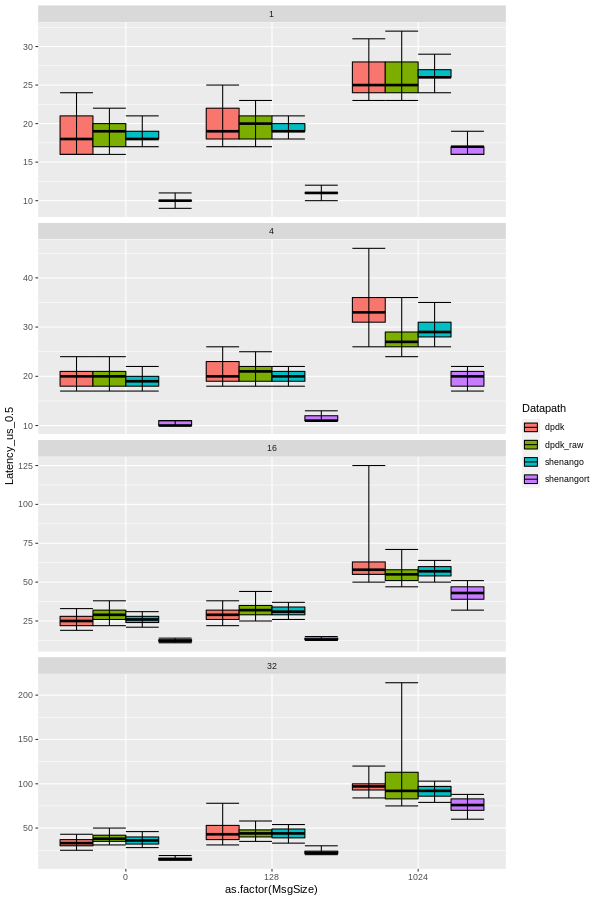

In [12]:
%%R -i exps -w 600 -h 900

library(ggplot2)

ggplot(exps, aes(x=as.factor(MsgSize), fill=Datapath)) +
  geom_crossbar(aes(ymin=Latency_us_0.25, y=Latency_us_0.5, ymax = Latency_us_0.75), position="dodge") +
  geom_errorbar(aes(ymin=Latency_us_0.05, ymax=Latency_us_0.95), position="dodge") +
  facet_wrap(~BurstSize, ncol=1, scale="free_y")